<a href="https://colab.research.google.com/github/Kkrishnaa30/Codeclause-Tasks/blob/main/Task2_Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Krishna Khandelwal                                                     

**Task 2**

# Fraud Detection - Credit Card

### About Dataset
The dataset has a time column which shows the transaction in seconds. The dataset have more columns from V1 to V28 which represents some feature about the transaction but as the transactions of credit cards are sensitive, the columns are presented by numbers. Moreover the data has 'Amount' column which is shows the transaction amount in dollars and 'Class' column shows whether the transaction is fraud or not.

Kaggle link for the Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
credit_card = pd.read_csv('creditcard.csv')

In [5]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95162 entries, 0 to 95161
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    95162 non-null  int64  
 1   V1      95162 non-null  float64
 2   V2      95162 non-null  float64
 3   V3      95162 non-null  float64
 4   V4      95162 non-null  float64
 5   V5      95162 non-null  float64
 6   V6      95162 non-null  float64
 7   V7      95162 non-null  float64
 8   V8      95162 non-null  float64
 9   V9      95162 non-null  float64
 10  V10     95162 non-null  float64
 11  V11     95162 non-null  float64
 12  V12     95162 non-null  float64
 13  V13     95161 non-null  float64
 14  V14     95161 non-null  float64
 15  V15     95161 non-null  float64
 16  V16     95161 non-null  float64
 17  V17     95161 non-null  float64
 18  V18     95161 non-null  float64
 19  V19     95161 non-null  float64
 20  V20     95161 non-null  float64
 21  V21     95161 non-null  float64
 22

In [7]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

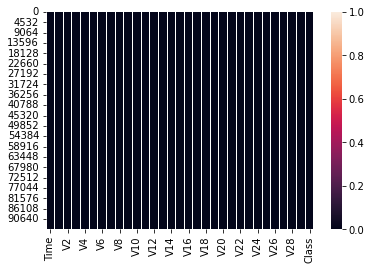

In [8]:
sns.heatmap(credit_card.isnull())
plt.show()

In [9]:
cc = credit_card.copy()

In [10]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
cc['Class'].value_counts()

0.0    94944
1.0      217
Name: Class, dtype: int64

In [12]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,41232.783620,-0.25064,-0.047145,0.696491,0.15125,-0.270069,0.097914,-0.093292,0.048787,-0.032333,...,0.043401,-0.031938,-0.107340,-0.037071,0.009933,0.13190,0.026607,-0.000819,0.001332,98.685374
1.0,35870.354839,-6.16618,4.217965,-8.087819,4.99603,-4.444345,-1.845983,-6.417590,2.796291,-2.953535,...,0.354728,0.731128,-0.127758,-0.247689,-0.102596,0.20696,0.097699,0.532822,0.035472,109.784286


In [13]:
normal = cc[cc.Class == 0]
fraud = cc[cc.Class == 1]

In [14]:
normal.shape , fraud.shape

((94944, 31), (217, 31))

In [15]:
normal.Amount.describe()

count    94944.000000
mean        98.685374
std        267.432993
min          0.000000
25%          7.600000
50%         26.720000
75%         89.752500
max      19656.530000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     217.000000
mean      109.784286
std       243.927116
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [17]:
#As the data is not distributed evenly, we must try to disribute evenly
normal_sample = normal.sample(n = 492)

In [18]:
cc_final = pd.concat([normal_sample, fraud], axis = 0)

In [19]:
cc_final.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67875,52731,-1.476612,-0.900380,1.031555,3.273433,-5.122927,5.885657,4.021096,0.070830,-0.085064,...,0.108419,0.979071,0.513227,-1.179728,0.009135,0.562430,0.574345,-0.155964,1202.19,0.0
82654,59492,-0.407769,1.039473,0.729375,1.193844,-0.769400,-0.231593,0.010087,0.359680,-0.426164,...,0.103228,0.349138,0.264682,0.584597,-1.401814,0.228701,-0.120297,0.173589,30.92,0.0
83053,59669,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1.0
47990,43450,0.078066,0.508640,1.680155,0.841552,0.025165,0.480944,0.447201,-0.579214,1.410880,...,-0.033151,0.447812,-0.043093,-0.484721,-1.257232,-0.627683,-0.763481,-0.495913,12.99,0.0
37533,38997,-0.357581,0.908918,1.687209,0.973537,0.365381,-0.682356,0.943466,-0.693524,-0.451395,...,-0.261895,-0.307596,0.119065,0.384212,-0.632086,0.203812,-0.417865,-0.306142,1.98,0.0


In [20]:
#Checking if the data is evenly distributed or not
dis = cc_final['Class'].value_counts()
dis

0.0    492
1.0    217
Name: Class, dtype: int64

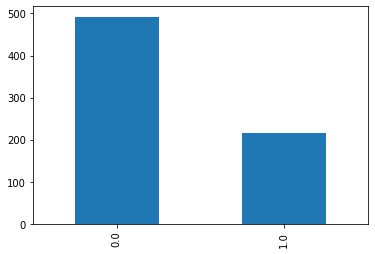

In [21]:
dis.plot(kind = 'bar')
plt.show()

In [22]:
cc_final.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,40973.325203,-0.193381,-0.283562,0.725251,0.189769,-0.236823,0.128158,-0.077853,0.040845,-0.009196,...,0.129784,0.025825,-0.125945,-0.009711,-0.028830,0.154994,0.007719,-0.025464,-0.027287,115.916260
1.0,35870.354839,-6.166180,4.217965,-8.087819,4.996030,-4.444345,-1.845983,-6.417590,2.796291,-2.953535,...,0.354728,0.731128,-0.127758,-0.247689,-0.102596,0.206960,0.097699,0.532822,0.035472,109.784286


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
x = cc_final.drop(['Class'], axis = 1)
y = cc_final['Class']

In [25]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
5185,4942,1.054885,-0.558337,-0.522328,-0.357718,-0.268561,-0.600676,-0.057186,-0.271195,-0.228717,...,0.387420,0.216115,0.506129,-0.320170,-0.048315,0.653081,-0.083717,-0.052907,0.031500,169.00
85534,60812,1.052610,-0.161350,0.190391,1.259294,-0.172069,0.297286,-0.129089,0.266126,0.382070,...,-0.214113,-0.068596,-0.209817,-0.129953,-0.345397,0.585089,-0.307521,0.012335,0.005977,55.38
16213,27619,1.226343,0.030322,0.310517,0.469478,-0.401994,-0.490995,-0.158121,0.033549,0.061860,...,-0.145500,-0.046784,-0.213162,-0.039847,-0.004869,0.366468,0.312590,-0.044399,-0.000307,10.15
25525,33651,-0.690229,0.760045,1.406236,0.096655,-0.161155,0.087299,0.274078,0.330343,0.275871,...,0.103423,0.042907,0.509002,-0.011514,0.250509,-0.595134,0.284278,0.517935,0.295442,12.31
39852,39993,1.191304,0.253729,0.396967,0.727915,-0.421416,-0.810651,-0.045113,-0.035737,0.140113,...,-0.181392,-0.249262,-0.727338,0.210485,0.335855,0.070315,0.106978,-0.011759,0.028662,0.89


In [26]:
y.head()

5185     0.0
85534    0.0
16213    0.0
25525    0.0
39852    0.0
Name: Class, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=0)

In [28]:
lg = LogisticRegression()

In [29]:
lg.fit(X_train, y_train)

LogisticRegression()

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((496, 30), (213, 30), (496,), (213,))

In [31]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [32]:
y_train.shape, y_test.shape

((496, 1), (213, 1))

In [33]:
lg.score(X_test, y_test)

0.9577464788732394

In [34]:
y_train_pred = lg.predict(X_train)
y_train_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0.

In [35]:
y_test_pred = lg.predict(X_test)
y_test_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0.])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [37]:
print("R2Score : " ,r2_score(y_test, y_test_pred)) 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred)) 
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.8007276507276508
mean_absolute_error :  0.04225352112676056
mean_squared_error :  0.04225352112676056
Root mean_squared_error :  0.2055566129482595


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) 

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train)
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_train_std,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9757283659730722
R squared: 0.9757283659730722


In [40]:
print ('Logistic Regression Accuracy: {}'.format(lg.score(X_test, y_test)))
print ('Random Forest Accuracy: {}'.format(rf_tree.score(X_train_std,y_train)))

Logistic Regression Accuracy: 0.9577464788732394
Random Forest Accuracy: 0.9757283659730722


#### **Conclusion**
Random Forest Regressor has more accuracy than Logistic Regression. So we can use Random Forest Regressor to detect the fraud in credit transaction.